# Hierarchical Clustering
Within this, we're going to use Scikit-Learn and Matplotlib to visualize how hierarchical clustering works.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')

In [3]:
data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
# Remove the several columns for the sake of this exercise
#data = data.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis=1)

# Remove rows with NaN
data = data.dropna()


# View the first five rows

data.head()


,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [5]:
# Only use the first 50 datapoints of the dataset for easy visualization
# INSERT CODE HERE
df = data.head(50)

In [6]:
# View the shape of the data frame. It should be (50, 17)
# INSERT CODE HERE
df_data = pd.DataFrame(df)

# Get the shape of the DataFrame
df_shape = df_data.shape
print(df_shape)

(50, 21)


In [9]:
df_numbers = df_data.select_dtypes(include='number')

In [11]:
df_numbers.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [12]:
# Using the AgglomerativeClustering() function with a distance threshold of 0 and no n_clusters, fit the dataset.
# INSERT CODE HERE

model = AgglomerativeClustering(distance_threshold=0, n_clusters = None)
model = model.fit(df_numbers)

In [22]:
# Print out the distances of that model
# I.e. n_clusters_, min(), and max()

# Create and fit the AgglomerativeClustering model
model.distances_
print(model.distances_.min())
print(model.distances_.max())


94.14881836751856
21721.675861129785


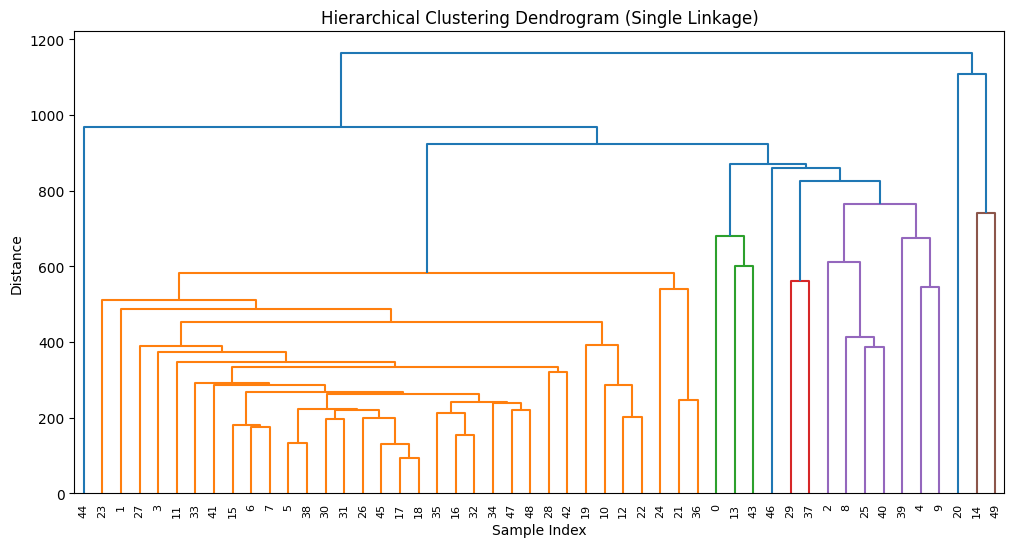

In [24]:
# Single
# Using single linkage, create and display a dendogram.
# import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering



# Fit AgglomerativeClustering model with single linkage
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='single')
model.fit(df_numbers)

# Generate linkage matrix
linkage_matrix = linkage(df_numbers, method='single')

# Display dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


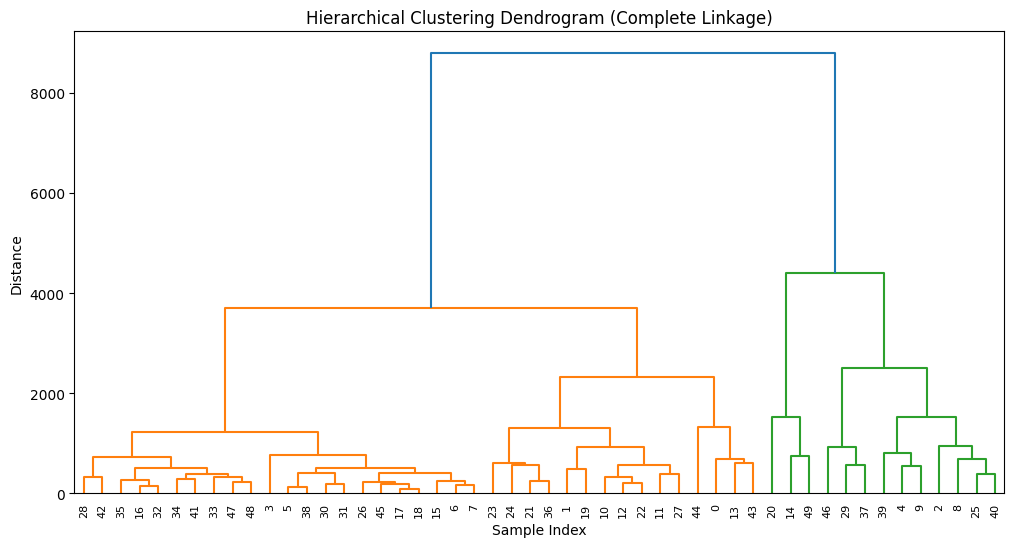

In [26]:
# Complete
# Using complete linkage, create and display a dendogram.

model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
model.fit(df_numbers)

# Generate linkage matrix
linkage_matrix = linkage(df_numbers, method='complete')

# Display dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

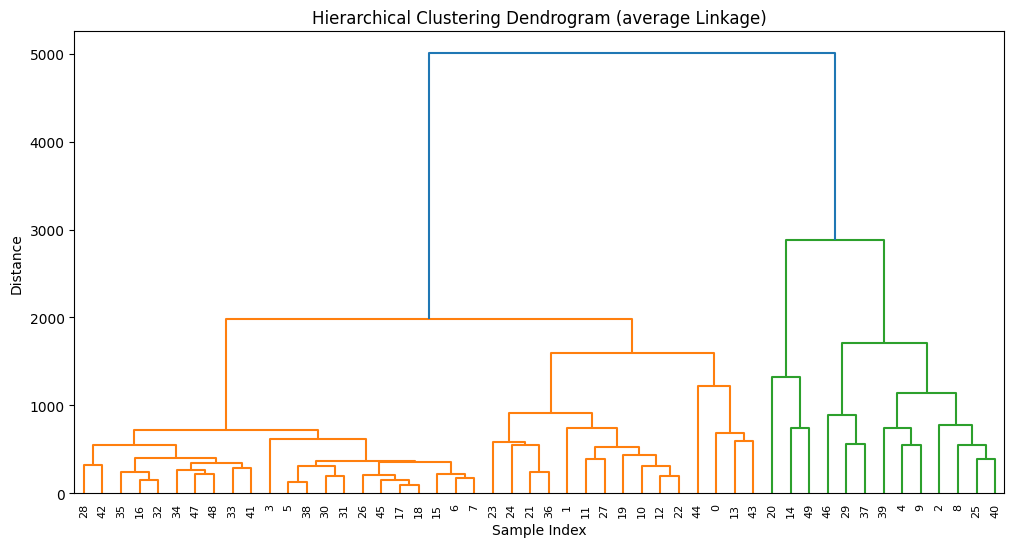

In [27]:
# Average
# Using average linkage, create and display a dendogram.

model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='average')
model.fit(df_numbers)

# Generate linkage matrix
linkage_matrix = linkage(df_numbers, method='average')

# Display dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

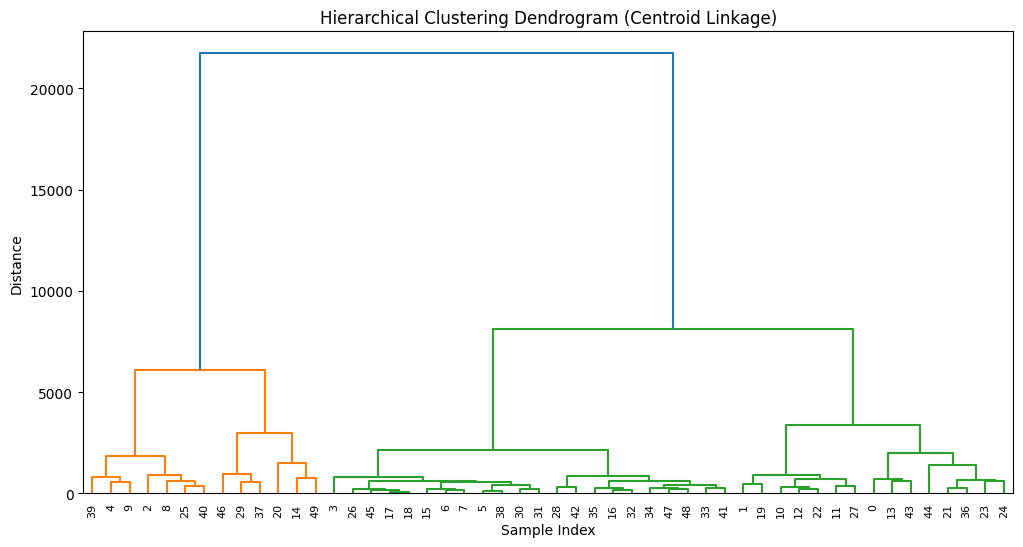

In [29]:
# Centroid
# Using centroid linkage, create and display a dendogram.

model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
model.fit(df_numbers)

# Generate linkage matrix
linkage_matrix = linkage(df_numbers, method='ward')

# Display dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Centroid Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Cluster Labels:
[1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 1 0]


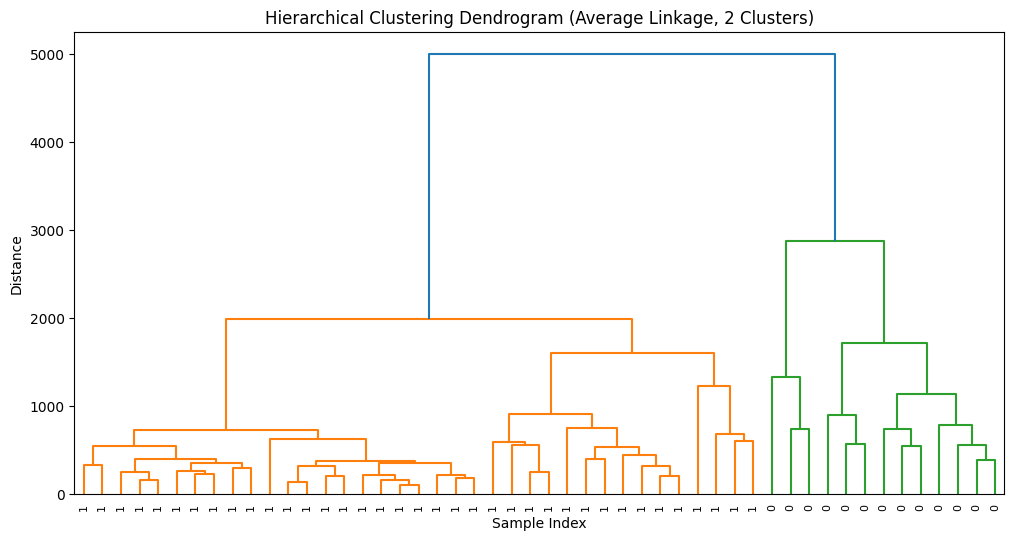

In [34]:
# After observing the dendograms above, let's say that you want to choose "Average" linkage with only 2 clusters.
# What are the labels of each of the datapoints?
# Print these labels out
model = AgglomerativeClustering(n_clusters=2, linkage='average')
labels = model.fit_predict(df_numbers)

# Access the labels of each data point
print("Cluster Labels:")
print(labels)

# Display dendrogram
linkage_matrix = linkage(df_numbers, method='average')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=labels)  # Pass the labels to the dendrogram function
plt.title('Hierarchical Clustering Dendrogram (Average Linkage, 2 Clusters)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()